In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data=pd.read_csv("D:/DATA SCIENCE/DATA SCIENCE ASSIGNMENTS/Assignments/Association Rule/my_movies.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


### Pre-processing

In [9]:
#As the data is not in transaction formation we using transaction formation
data=pd.get_dummies(data)
data.tail()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


### Apriori Algorithm

In [10]:
frequent_itemsets=apriori(data,min_support=0.001,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree..."
1393,0.1,"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree..."
1394,0.1,"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree..."
1395,0.1,"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree..."


In [11]:
rules=association_rules(frequent_itemsets,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64219,(V2_LOTR1),"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64220,(Sixth Sense),"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64221,(LOTR1),"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64222,(V3_Harry Potter1),"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


Text(0, 0.5, 'support')

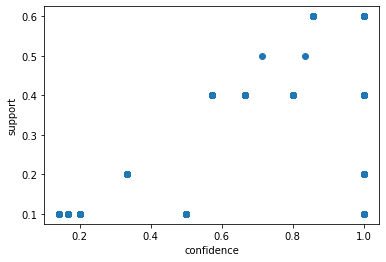

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(rules.confidence,rules.support);plt.xlabel("confidence");plt.ylabel("support")

Text(0, 0.5, 'support')

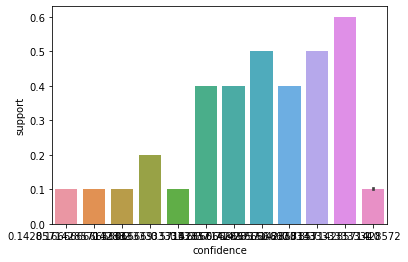

In [13]:
sns.barplot(x=rules.confidence,y=rules.support);plt.xlabel("confidence");plt.ylabel("support")

In [14]:
rules_confi=association_rules(frequent_itemsets,metric='confidence')
rules_confi

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V2_LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
56754,"(LOTR1, Harry Potter1)","(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56755,"(V3_Harry Potter1, Harry Potter1)","(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,(V5_LOTR2),"(V1_Sixth Sense, V4_Green Mile, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V2_LOTR1),"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


Text(0, 0.5, 'support')

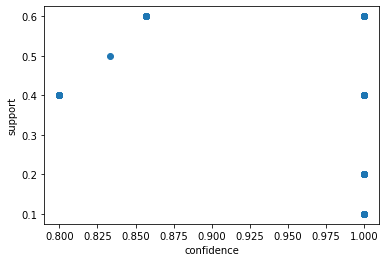

In [15]:
plt.scatter(rules_confi.confidence,rules_confi.support);plt.xlabel("confidence");plt.ylabel("support")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'support')

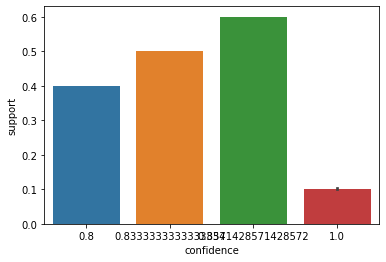

In [16]:
sns.barplot(rules_confi.confidence,rules_confi.support);plt.xlabel("confidence");plt.ylabel("support")

In [30]:
#NOW WE CHANGING min_support VALUE IN APRIORI ALGORITHM
frequent_patterns1=apriori(data,min_support=0.2,use_colnames=True)
frequent_patterns1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V2_Patriot, Patriot, Gladiator, V3_Sixth Sens..."
77,0.4,"(V2_Patriot, V1_Gladiator, Gladiator, V3_Sixth..."
78,0.4,"(V2_Patriot, V1_Gladiator, Patriot, V3_Sixth S..."
79,0.4,"(V2_Patriot, V1_Gladiator, Patriot, Gladiator,..."


In [31]:
rules_lift=association_rules(frequent_patterns1,metric='lift')
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V1_Gladiator),"(V2_Patriot, Patriot, Gladiator, V3_Sixth Sens...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Patriot),"(V2_Patriot, V1_Gladiator, Gladiator, V3_Sixth...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Gladiator),"(V2_Patriot, V1_Gladiator, Patriot, V3_Sixth S...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
652,(V3_Sixth Sense),"(V2_Patriot, V1_Gladiator, Patriot, Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


Text(0, 0.5, 'support')

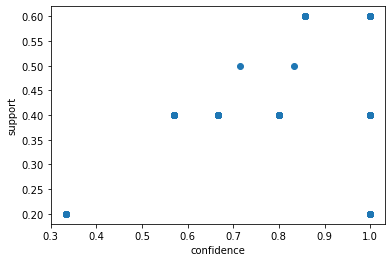

In [32]:
plt.scatter(rules_lift.confidence,rules_lift.support);plt.xlabel("confidence");plt.ylabel("support")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'support')

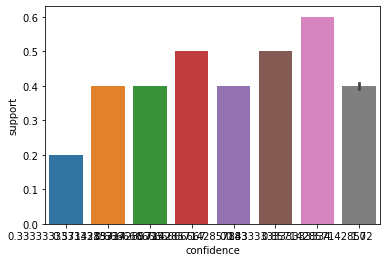

In [33]:
sns.barplot(rules_lift.confidence,rules_lift.support);plt.xlabel("confidence");plt.ylabel("support")

In [34]:
rules_confi2=association_rules(frequent_patterns1,metric='confidence')
rules_confi2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(V3_Sixth Sense),(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
4,(V4_Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
417,"(Sixth Sense, Patriot)","(V2_Patriot, V3_Sixth Sense, V1_Gladiator, Gla...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
418,"(V3_Sixth Sense, Gladiator)","(Sixth Sense, V2_Patriot, Patriot, V1_Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
419,"(Sixth Sense, Gladiator)","(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi...",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
420,"(Sixth Sense, V3_Sixth Sense)","(V2_Patriot, Patriot, V1_Gladiator, Gladiator)",0.4,0.6,0.4,1.000000,1.666667,0.16,inf


Text(0, 0.5, 'support')

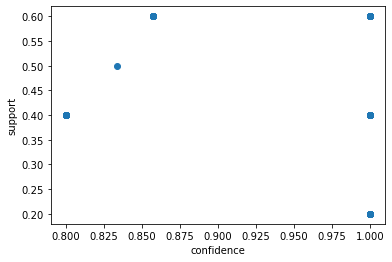

In [35]:
plt.scatter(rules_confi2.confidence,rules_confi2.support);plt.xlabel("confidence");plt.ylabel("support")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'support')

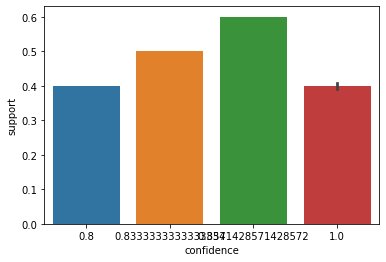

In [36]:
sns.barplot(rules_confi2.confidence,rules_confi2.support);plt.xlabel("confidence");plt.ylabel("support")